# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/"

# II] Data download

In [5]:
path2 = 'dataframes_for_input/'

In [6]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/"
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_all.csv', sep = ",")

#remove Survival information
df_ATG7_Normal.drop(df_ATG7_Normal.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(5847, 17)
Wall time: 37 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.085097,3.955992,2.641679,1.137484,32.944283,14.519306,5.240574,1.19997,20.959850,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-OXRO-1726-SM-3LK6C,Normal Tissue,Muscle,4.001888,2.821767,1.823465,0.000000,15.020948,6.070277,2.539302,0.00000,8.609579,70.506084,29.493916,0.000000,0.404121,0.169051


In [7]:
df_ATG7_Normal.Primary_Site.value_counts()

Brain              818
Esophagus          629
Blood Vessel       603
Skin               544
Adipose Tissue     510
Colon              295
Lung               285
Thyroid            278
Nerve              278
Breast             179
Testis             157
Muscle             150
Heart              122
Adrenal Gland      121
Stomach            119
Pituitary          107
Prostate            99
Spleen              97
Small Intestine     90
Ovary               88
Vagina              84
Uterus              78
Salivary Gland      53
Pancreas            36
Liver               27
Name: Primary_Site, dtype: int64

# III] ATG7 expression per tissues

In [8]:
path2 = 'figs_ATG7_characterisation/'

## A) ATG7 isoform percentage

In [9]:
#heatmap data preparation
##select columns
df_sampletype = df_ATG7_Normal[['Primary_Site',
                                'ATG7_tpm',
                                'ATG7_1tpm',
                                'ATG7_2tpm',
                                'ATG7_1perc',
                                'ATG7_2perc',
                                'ATG7_3perc']]

##Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_tpm': 'tpm ATG7',
                                                'ATG7_1tpm': 'tpm ATG7(1)',
                                                'ATG7_2tpm': 'tpm ATG7(2)',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
df_sampletype = df_sampletype.round(2)

df_sampletype.head()

,tpm ATG7,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3)
Primary Site,,,,,,
Adipose Tissue,13.23,6.72,1.54,79.13,17.57,3.29
Adrenal Gland,11.99,6.32,1.63,78.28,18.38,3.34
Blood Vessel,14.28,8.24,1.17,85.67,12.05,2.28
Brain,9.47,6.63,0.40,94.27,4.79,0.94
Breast,12.68,7.06,1.22,83.06,14.29,2.65


In [132]:
#nearest int to try to have 100% final...
cols = ['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']
df_sampletype[cols] = df_sampletype[cols].apply(lambda x: round(x))
df_sampletype['total%'] = df_sampletype['% ATG7(1)'] + df_sampletype['% ATG7(2)'] + df_sampletype['% ATG7(3)']
df_sampletype

,tpm ATG7,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3),total%
Primary Site,,,,,,,
Adipose Tissue,13.23,6.72,1.54,79.0,18.0,3.0,100.0
Adrenal Gland,11.99,6.32,1.63,78.0,18.0,3.0,99.0
Blood Vessel,14.28,8.24,1.17,86.0,12.0,2.0,100.0
Brain,9.47,6.63,0.40,94.0,5.0,1.0,100.0
Breast,12.68,7.06,1.22,83.0,14.0,3.0,100.0
Colon,9.70,5.68,0.84,86.0,12.0,2.0,100.0
Esophagus,10.90,5.58,1.50,78.0,19.0,4.0,101.0
Heart,6.65,3.05,0.97,73.0,23.0,4.0,100.0
Liver,5.27,2.90,0.57,85.0,12.0,3.0,100.0


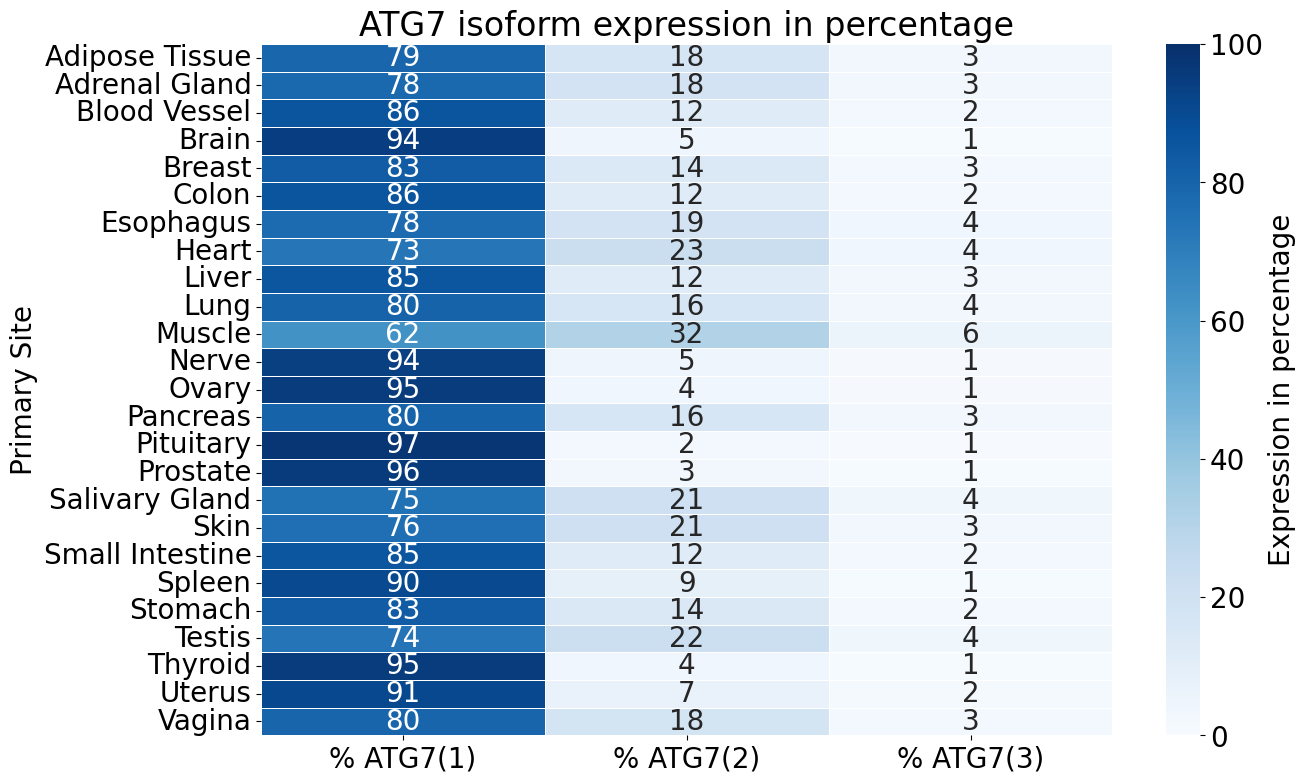

In [36]:
#heatmap percentage
info = 'normal_tissue'
plt.subplots()
plt.tight_layout()

HeatMap_df_sampletype = df_sampletype[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="Blues", linewidths=.5,
                vmin = 0, vmax = 100,
                xticklabels=True, yticklabels=True, fmt='.0f',
                cbar_kws={'label': 'Expression in percentage'})
plt.title('ATG7 isoform expression in percentage')

name = 'heatmap_organs_' + info
plt.savefig(path+path2+name+'_article.svg')

                  FC_ATG7
tissue                   
Muscle          -0.596362
Heart           -1.013705
Salivary Gland  -1.300006
Testis          -1.501593
Skin            -1.501616
Adrenal Gland   -1.527740
Pancreas        -1.558000
Liver           -1.636813
Stomach         -1.636836
Adipose Tissue  -1.684914
Esophagus       -1.812930
Vagina          -1.832711
Small Intestine -1.836993
Lung            -1.837616
Breast          -1.886158
Colon           -2.045673
Blood Vessel    -2.249110
Spleen          -2.599768
Brain           -2.614650
Pituitary       -2.632424
Thyroid         -2.880692
Prostate        -2.884262
Ovary           -2.943284
Uterus          -2.958425
Nerve           -3.092740


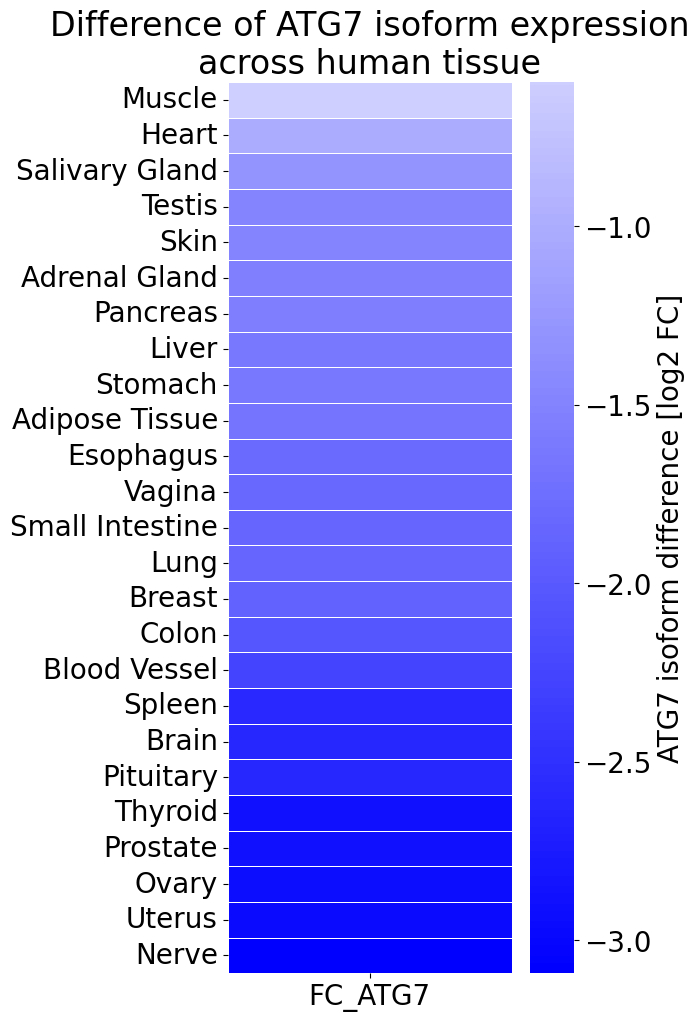

In [51]:
# Calculate fold change. 
tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
tissue_l = []

isoforms = 'ATG7_1', 'ATG7_2'

foldchange_l = []

for tissue in tissues:
    tissue_l.append(tissue)
    
    df = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    #calculate FoldChange (primary / normal)
    fc = df['ATG7_2'].median() - df['ATG7_1'].median()
    foldchange_l.append(fc)

#save in dict, then to df
d = dict(tissue = tissue_l, FC_ATG7 = foldchange_l)
df_ATG7_diff_tissues = pandas.DataFrame.from_dict(d, orient='columns')
df_ATG7_diff_tissues = df_ATG7_diff_tissues.sort_values('FC_ATG7', ascending=False)
# and reset_index
df_ATG7_diff_tissues.set_index('tissue',inplace = True, drop = True)
print(df_ATG7_diff_tissues)

#Heatmap correlation
df = df_ATG7_diff_tissues
HeatMap_df = df[['FC_ATG7']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0,
               cbar_kws={'label': 'ATG7 isoform difference [log2 FC]'})
plt.ylabel('')
plt.title('Difference of ATG7 isoform expression\nacross human tissue')

title_file = 'Heatmap_difference_expression'
plt.savefig(path+path2+title_file+'.svg')

In [11]:
df_perc_all = HeatMap_df_sampletype.melt()
df_perc_all['variable'] = df_perc_all['variable'].str.split(' ', expand=True)[1]
df_perc_all

,variable,value
0,ATG7(1),79.13
1,ATG7(1),78.28
2,ATG7(1),85.67
3,ATG7(1),94.27
4,ATG7(1),83.06
...,...,...
70,ATG7(3),2.37
71,ATG7(3),4.23
72,ATG7(3),0.97
73,ATG7(3),1.81


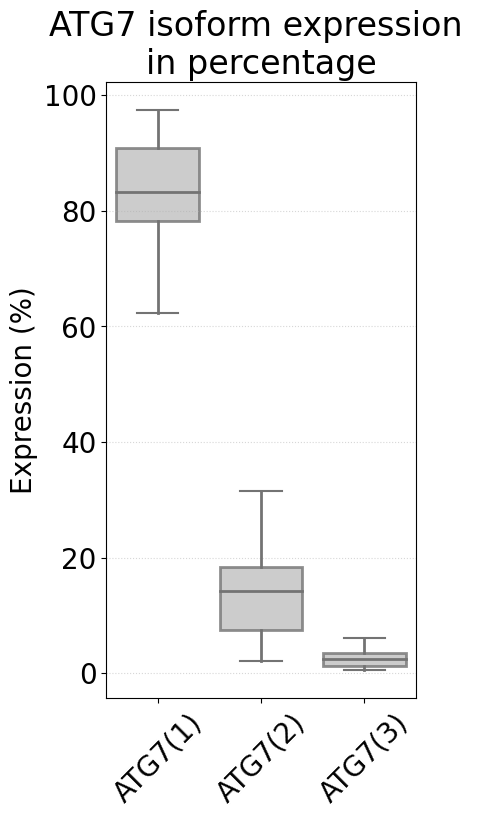

In [42]:
#graph
plt.figure(figsize=(4, 8))
seaborn.boxplot(x="variable", y="value", color = 'silver',
                data = df_perc_all, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.title('ATG7 isoform expression \nin percentage')
plt.ylabel('Expression (%)')
plt.xlabel('')
plt.xticks(rotation = 45)
#save
name = 'boxplot_percentage'
plt.savefig(path+path2+name+'_article.svg')

## B) Expression of the isoforms in all tissues

In [13]:
df_tissues = df_ATG7_Normal[['Primary_Site',
                             'ATG7_tpm',
                             'ATG7_1tpm',
                             'ATG7_2tpm']]

##Column rename
df_tissues = df_tissues.rename(columns = {'Primary_Site' : 'Primary Site', 
                                          'ATG7_tpm': 'tpm ATG7',
                                          'ATG7_1tpm': 'tpm ATG7(1)',
                                          'ATG7_2tpm': 'tpm ATG7(2)'})
df_tissues = df_tissues.sort_values('Primary Site')
df_tissues.head(2)

,Primary Site,tpm ATG7,tpm ATG7(1),tpm ATG7(2)
466,Adipose Tissue,11.598575,7.249096,0.549991
437,Adipose Tissue,12.209074,7.149281,1.860028


tpm ATG7


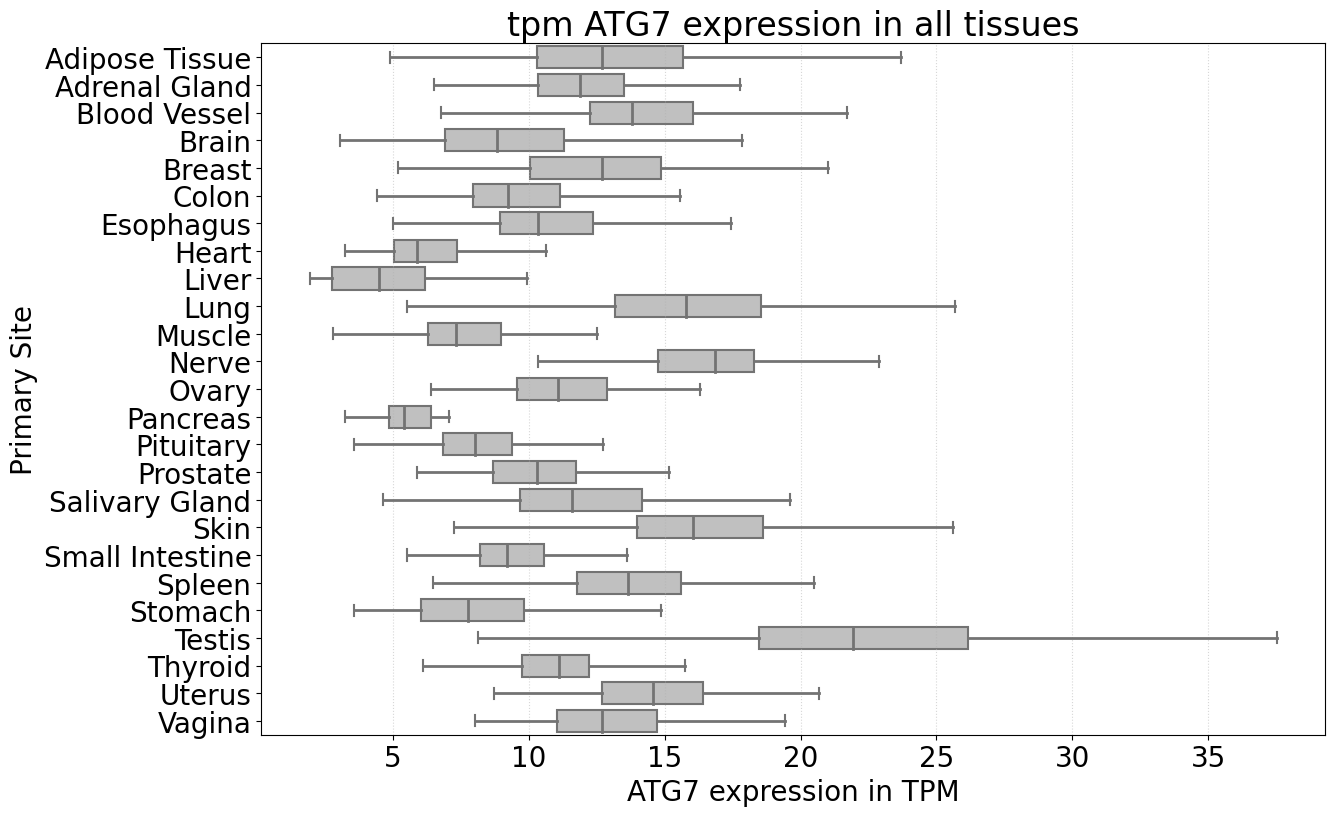

tpm ATG7(1)


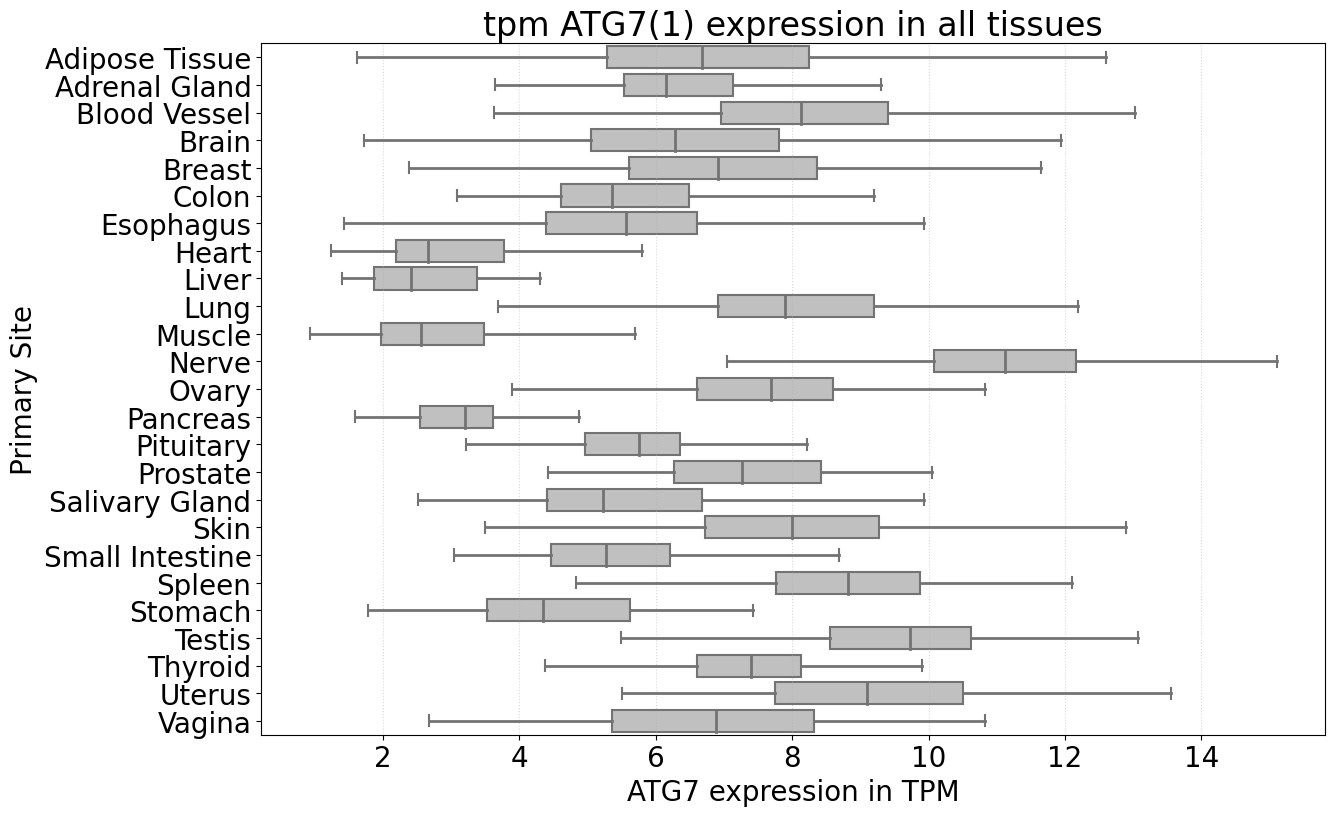

tpm ATG7(2)


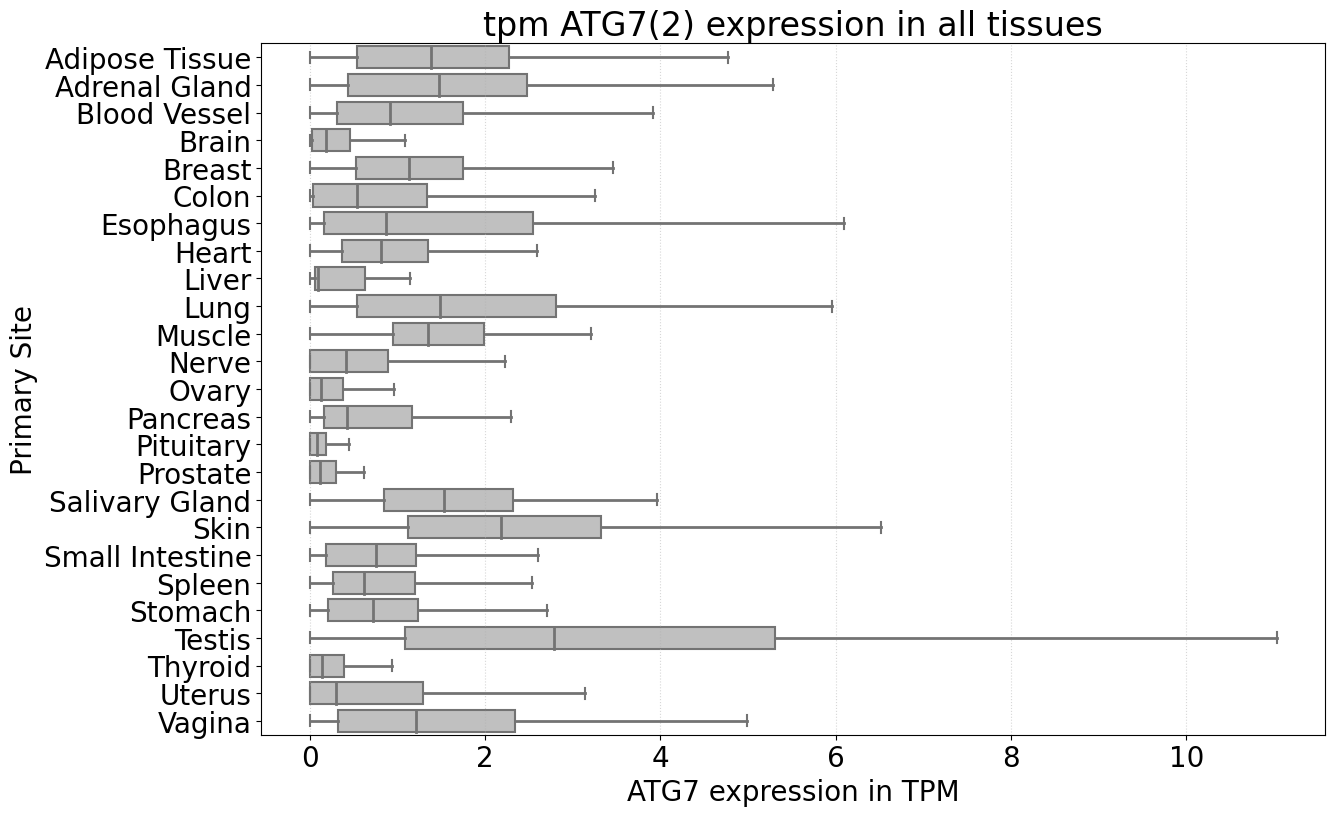

In [14]:
isoforms = 'tpm ATG7', 'tpm ATG7(1)', 'tpm ATG7(2)'
color_ = 'silver'
tissues_L = list(set(df_tissues['Primary Site']))

for isoform in isoforms:
    print(isoform)
    
    plt.subplots()
    plt.tight_layout()
    
    seaborn.boxplot(data = df_tissues, x =  isoform, y = 'Primary Site', 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False,
                    color = color_)

    plt.title(isoform +' expression in all tissues')
    plt.xlabel('ATG7 expression in TPM')
    
    name = 'boxplot_organs_' + isoform
    plt.savefig(path+path2+name+'_article.svg')
    
    plt.show()
    plt.close()

## C) ATG7 isoform correlation

### 1. For all tissue

The correlation between iso1 and iso2 in normal_tissue is: -0.06475562401581977, 7.206081943096637e-07


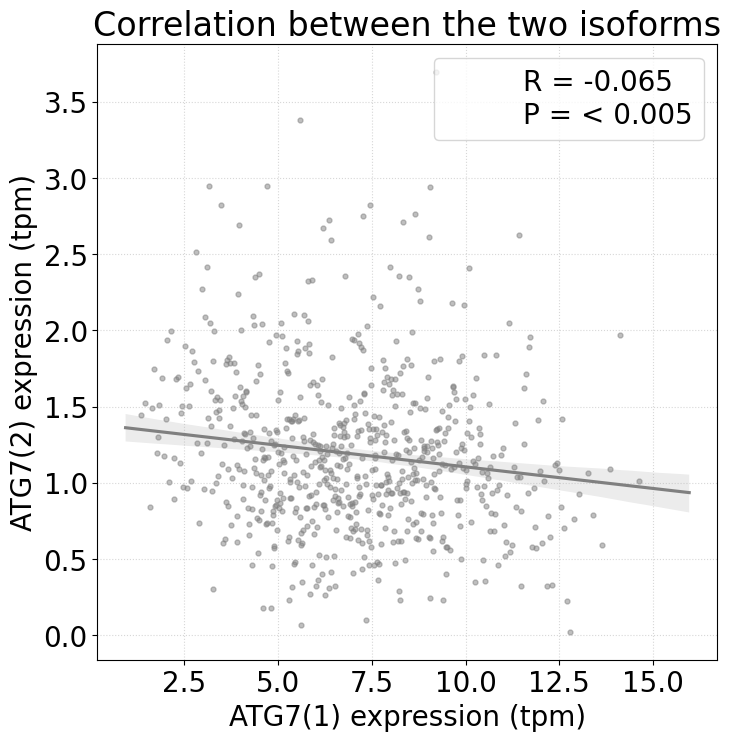

In [43]:
#Graph and stats_ spearman correlation
pvalue_text = '< 0.005'

x = df_ATG7_Normal['ATG7_1tpm'].to_list()
y = df_ATG7_Normal['ATG7_2tpm'].to_list()    

#stat Spearman correlation 
r_value, p_value = scipy.stats.spearmanr(x, y)
print(f'The correlation between iso1 and iso2 in {info} is: {r_value}, {p_value}')

#graph
plt.figure(figsize=(8, 8))
seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker=".",
                scatter_kws={"color": "grey", "alpha": 0.5}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'R = {str(round(r_value,3))} \nP = {str(pvalue_text)}')

plt.title(f'Correlation between the two isoforms')
plt.xlabel("ATG7(1) expression (tpm)")
plt.ylabel('ATG7(2) expression (tpm)')

plt.grid(ls = ":", alpha=0.5)
plt.legend()

#save
title_file = 'ATG7s_corr_tpm_' + info
plt.savefig(path+path2+title_file+'_article.svg')

plt.show()  
print()

### 2. For each tissue

In [44]:
#stats_ spearman correlation
#graph
tissue_l = []
r_value_l = []
p_value_l = []

tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
for tissue in tissues:  

#     print(tissue)
    df = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]  
    color_ = 'silver'
    
    x = df['ATG7_1tpm'].to_list()
    y = df['ATG7_2tpm'].to_list()    

    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)

    r_value_l.append(r_value)
    p_value_l.append(p_value)
    tissue_l.append(tissue)
           
#save in dict, then to df
d = dict(tissue = tissue_l, Corr_score = r_value_l, P_value = p_value_l)

#Transpose to have a better table
df_atg7_correlation_tissues = pandas.DataFrame.from_dict(d, orient='index')
df_atg7_correlation_tissues = df_atg7_correlation_tissues.transpose()

#keep minimum text in sample_type for later
df_atg7_correlation_tissues.head(4)

,tissue,Corr_score,P_value
0,Lung,-0.152037,0.010159
1,Muscle,-0.038594,0.639142
2,Nerve,-0.252185,0.000021
3,Pancreas,-0.434057,0.00817


In [45]:
#split the df based on the normal and primary
df_atg7_correlation_tissues.sort_values('Corr_score', inplace = True)
df_atg7_correlation_tissues.set_index('tissue', inplace = True)
df_atg7_correlation_tissues

,Corr_score,P_value
tissue,,
Esophagus,-0.572066,0.0
Vagina,-0.55072,0.0
Heart,-0.435062,0.000001
Pancreas,-0.434057,0.00817
Blood Vessel,-0.409283,0.0
Colon,-0.388798,0.0
Skin,-0.365209,0.0
Testis,-0.291397,0.000213
Uterus,-0.278174,0.013664


In [46]:
df_atg7_correlation_tissues.T

tissue,Esophagus,Vagina,Heart,Pancreas,Blood Vessel,Colon,Skin,Testis,Uterus,Nerve,...,Breast,Salivary Gland,Adipose Tissue,Ovary,Muscle,Pituitary,Prostate,Spleen,Liver,Brain
Corr_score,-0.572066,-0.55072,-0.435062,-0.434057,-0.409283,-0.388798,-0.365209,-0.291397,-0.278174,-0.252185,...,-0.090093,-0.090082,-0.055908,-0.051867,-0.038594,-0.036182,-0.007312,0.11863,0.191301,0.31593
P_value,0.0,0.0,0.000001,0.00817,0.0,0.0,0.0,0.000213,0.013664,0.000021,...,0.230388,0.521212,0.207498,0.631283,0.639142,0.711383,0.942736,0.247143,0.339143,0.0


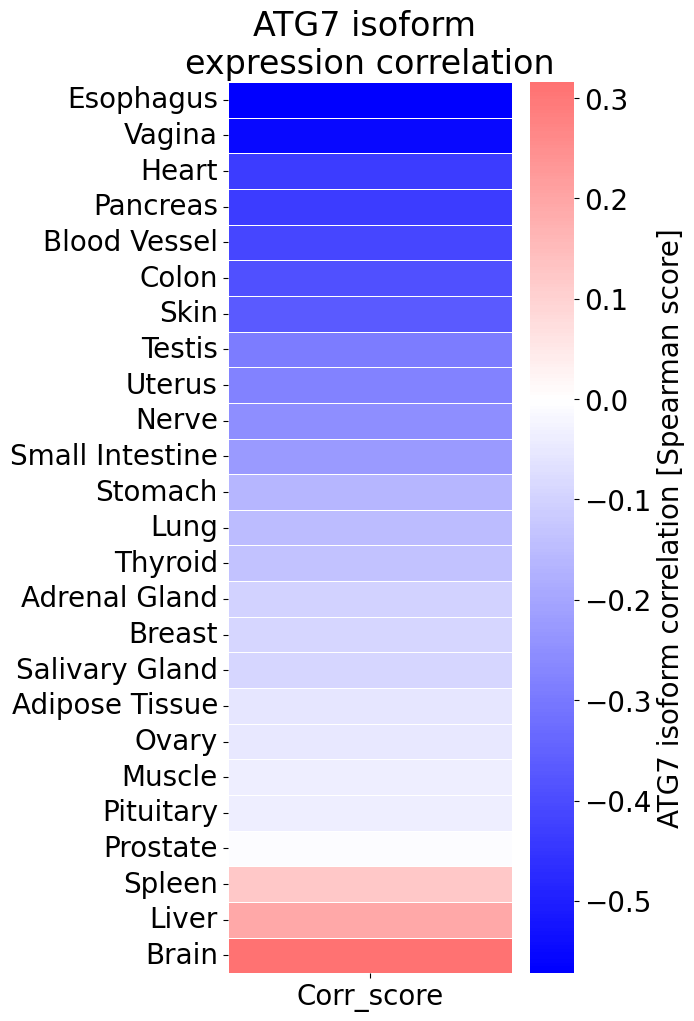

In [56]:
#Heatmap correlation
df = df_atg7_correlation_tissues
HeatMap_df = df[['Corr_score']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0,
               cbar_kws={'label': 'ATG7 isoform correlation [Spearman score]'})
plt.ylabel('')
plt.title('ATG7 isoform \nexpression correlation')

title_file = 'Heatmap_Correlation'
plt.savefig(path+path2+title_file+'.svg')